<a href="https://colab.research.google.com/github/zoldy22/Gold_prediction_project/blob/main/Gold_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing

### loading the csv data to a pandas dataframe

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting the statistical measures of the dada
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation: of the varioud features or variables
1. Positive Correlation
2. Negative Correlation

In [ ]:
gold_data = gold_data.drop('Date',axis=1)


In [ ]:
correlation = gold_data.corr()

<Axes: >

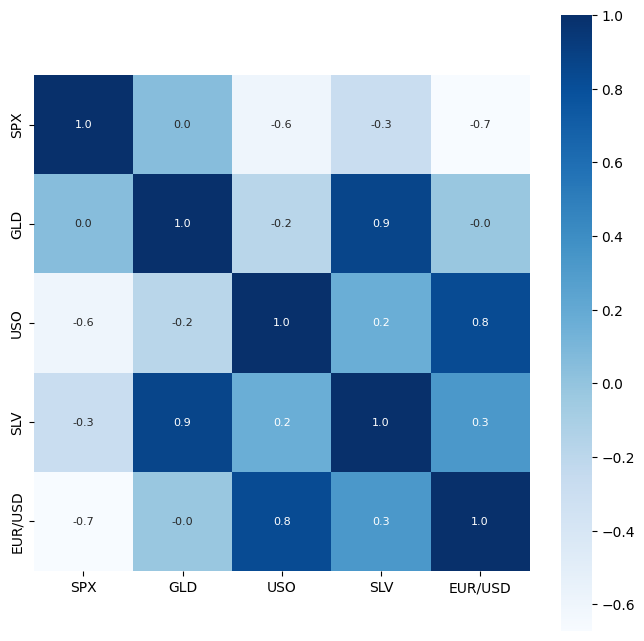

In [ ]:
# constructing a heatmap to understand the correlations
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f',annot = True,annot_kws={'fontsize':8},cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-b6184c1cbf84>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

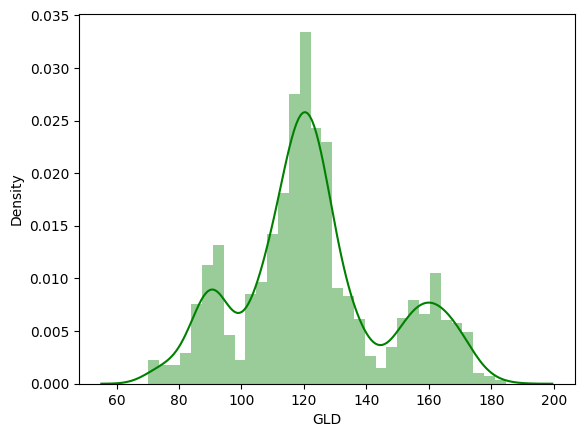

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color = 'green')

## Splitting the Features and Target

In [ ]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']


In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

### Model Training :
using Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)  #loaded the model into regressor variable

In [ ]:
# training the model
regressor.fit(X_train,Y_train) # fit function fits the data into the model

RandomForestRegressor()

### Model evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.58239945  81.91820004 116.18830046 127.66670066 120.77470146
 154.82729765 150.18169887 125.91270016 117.58629869 125.95730122
 116.58290145 171.86580137 142.16929892 167.90969907 115.21010023
 117.83940051 138.4862033  169.84870064 158.98070219 159.05639974
 154.9966999  125.21550005 176.12419932 157.07890324 125.19870041
  93.68489957  77.61990004 120.46780014 119.10339939 167.38849901
  88.07470056 124.97089963  91.13540066 117.64530002 121.10089924
 136.14860064 115.78170124 115.28090084 148.41679976 107.11870067
 104.50520262  87.14999807 126.60330002 117.83179979 152.63439957
 119.63510001 108.38299992 108.14939866  93.16140055 127.16809764
  74.39570057 113.66659944 121.05900017 111.25069904 118.85059882
 120.74629931 159.63790074 167.64770173 147.04229656  85.82659826
  94.22320041  87.0054986   90.41910026 119.04120073 126.52320064
 127.59780005 169.72750062 122.22589929 117.38099934  99.05400053
 167.97790149 143.32649815 131.79880289 121.07160228 120.95229938
 119.58960

In [ ]:
# comparing the estimated with actual values
# metric used is r squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error: ', error_score)

R squared error:  0.9892135479112488


### Compare the Actual Values and Predicted Values in a plot

In [ ]:
Y_test = list(Y_test)

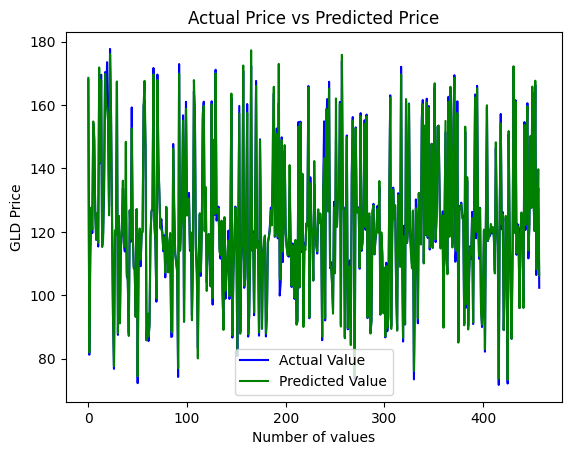

In [ ]:
plt.plot(Y_test,color='blue',label = 'Actual Value')
plt.plot(test_data_prediction,color='green',label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()